In [1]:
import numpy as np
import seaborn as sns
from numpy import sort
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from pandas import DataFrame
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("C:\\Users\Hannah\Desktop\Research Project\data.csv")
data = data.drop(["Unnamed: 32", "id"],1)
X = data.values[:,1:-1].astype('float64')
X = (X - np.mean(X, axis =0)) /  np.std(X, axis = 0)
X = np.hstack([np.ones((X.shape[0], 1)),X]) #adds bias column and arrays data into vectors for quicker calculations
X = MinMaxScaler().fit_transform(X)
Y = data["diagnosis"].map({'M':1,'B':0})
Y = np.array(Y)

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
print(X_train.shape)

(426, 30)


In [4]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)


select = SelectFromModel(logreg, threshold=0.9)
select.fit(X_train, Y_train)
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

print('Scikit-learn LR Accuracy All Features: {:.2f}'.format(logreg.score(X_test, Y_test)*100),  '%')

print("Scikit-learn LR All Features Report:")
Y_pred = logreg.predict(X_test)
target_names = ['Benign', 'Malignant']
print(classification_report(Y_test, Y_pred, target_names=target_names))

Scikit-learn LR Accuracy All Features: 95.10 %
Scikit-learn LR All Features Report:
             precision    recall  f1-score   support

     Benign       0.93      1.00      0.96        90
  Malignant       1.00      0.87      0.93        53

avg / total       0.95      0.95      0.95       143



In [5]:
def Sigmoid(z):
    return 1/(1 + np.exp(-z))

def Hypothesis(theta, X):   
    return Sigmoid(X @ theta) #@ symbol is a decorator to do matrix multiplication and part of python 3.5 only 

In [6]:
def Cost_Function(X,Y,theta,m, alpha, e):
    hi = Hypothesis(theta, X)
    _y = Y.reshape(-1, 1)
    J = 1/float(m) * np.sum(-_y * np.log(hi) - (1-_y) * np.log(1-hi))
    J = J + e * np.sum(abs(theta))
    return J

In [7]:
def Cost_Function_Regularisation(X,Y,theta,m,alpha, e):
    hi = Hypothesis(theta,X)
    _y = Y.reshape(-1, 1)
    J = alpha/float(m) * X.T @ (hi - _y)
    J = J + alpha * e * (theta >= 0).astype(float)
    return J

def Gradient_Descent(X,Y,theta,m,alpha,e):
    new_theta = theta - Cost_Function_Regularisation(X,Y,theta,m,alpha,e)
    return new_theta

LR Accuracy all features:  95.1048951049 %
Sckit-learn Accuracy score 95.104895 %
Coefficients (thetas):
[[  2.29202402e-04]
 [  1.13922310e+01]
 [  2.49980107e-01]
 [  4.85395049e-01]
 [  3.84025431e-04]
 [  6.35261647e+00]
 [  9.40708528e-05]
 [  1.28417829e+01]
 [  1.77609373e+01]
 [  4.28536807e-05]
 [  1.01066136e+01]
 [  1.93729227e+01]
 [  3.69942971e+00]
 [  4.37265585e-04]
 [  5.38727865e-04]
 [  5.03903242e+00]
 [  2.38195439e+00]
 [  1.22730383e+01]
 [  5.55581458e+00]
 [  3.81721938e+00]
 [  4.80032397e-04]
 [  2.32034260e-04]
 [  4.05490096e+00]
 [  6.33569678e-04]
 [  6.59290164e-01]
 [  1.06927778e+00]
 [  4.63563543e-04]
 [  3.96198009e-01]
 [  4.07772622e+00]
 [  3.16160101e+00]]


Plot of LR Coefficients (thetas):


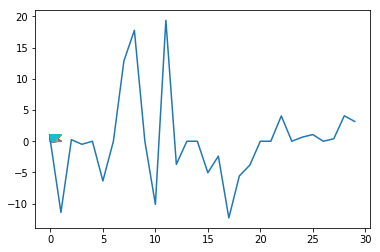

In [12]:
def Accuracy(theta):
    correct = 0
    length = len(X_test)
    prediction = (Hypothesis(theta, X_test) > 0.5) #replaced round to use predictions which are correct is ranging between the Y shape below
    _y = Y_test.reshape(-1, 1)
    correct = prediction == _y
    my_accuracy = (np.sum(correct) / length)*100
    #Using accuracy calculation made from scratch
    print ('LR Accuracy all features: ', my_accuracy, "%")
    #Assuring accuracy calculation is correct with validation from Scikit-learn accuracy function
    print("Sckit-learn Accuracy score %f" % (accuracy_score(Y_test, prediction)*100),"%")


def Logistic_Regression(X,Y,alpha,theta,num_iters):
    m = len(Y)
    for x in range(num_iters):
        new_theta = Gradient_Descent(X,Y,theta,m,alpha,e)
        theta = new_theta
        if x % 100 == 0:
            print #('theta: ', theta)    
            print #('cost: ', Cost_Function(X,Y,theta,m,alpha,e))
    Accuracy(theta)
    print("Coefficients (thetas):")
    theta.sort()
    print(abs(theta))
    x = np.linspace(-10, 30, 50)
    y = -(theta[0] + theta[1]*x)/theta[2]
    print("\n")
    print("Plot of LR Coefficients (thetas):")
    plt.plot(X, Y)
    plt.plot(theta)
    plt.show()

ep = .012   #sets initial theta to random non zero numbers +/- .012 specifically is arbitrary
e = 0.001
initial_theta = np.random.rand(X_train.shape[1],1) * 2 * ep - ep
alpha = 0.9
iterations = 100000
Logistic_Regression(X_train,Y_train,alpha,initial_theta,iterations)

Confusion Matrix: 
 [[89  1]
 [ 6 47]]


LR Report:
             precision    recall  f1-score   support

     Benign       0.94      0.99      0.96        90
  Malignant       0.98      0.89      0.93        53

avg / total       0.95      0.95      0.95       143

Sckit-learn Accuracy score 95.104895 %


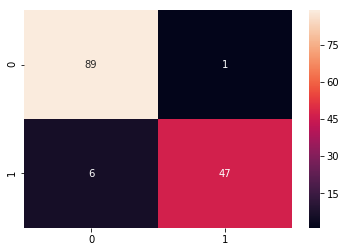

In [73]:
def Accuracy(theta):
    correct = 0
    length = len(X_test)
    prediction = (Hypothesis(theta, X_test) > 0.5) #replaced round to use predictions which are correct is ranging between the Y shape below
    _y = Y_test.reshape(-1, 1)
    correct = prediction == _y
    my_accuracy = (np.sum(correct) / length)*100
    
    #Confusion matrix and F1 scoring
    cm= confusion_matrix(Y_test, prediction)
    print("Confusion Matrix:", "\n", cm)
    sns.heatmap(cm,annot=True,fmt="d")
    print('\n')
    print("LR Report:")
    target_names = ['Benign', 'Malignant']
    print(classification_report(Y_test, prediction, target_names=target_names))
    print("Sckit-learn Accuracy score %f" % (accuracy_score(Y_test, prediction)*100),"%")


def Logistic_Regression(X,Y,alpha,theta,num_iters):
    m = len(Y)
    for x in range(num_iters):
        new_theta = Gradient_Descent(X,Y,theta,m,alpha,e)
        theta = new_theta
        if x % 100 == 0:
            print #('theta: ', theta)    
            print #('cost: ', Cost_Function(X,Y,theta,m))
    Accuracy(theta)


ep = .012   #sets initial theta to random non zero numbers +/- .012 specifically is arbitrary

initial_theta = np.random.rand(X_train.shape[1],1) * 2 * ep - ep
alpha = 0.9
iterations = 100000
Logistic_Regression(X_train,Y_train,alpha,initial_theta,iterations)
